## **Проект: Телекоммуникации. Предсказание оттока клиентов**

Цель проекта:
- разработка модели машинного обучения, предсказывающей вероятность оттока клиентов оператора связи «ТелеДом». цель — сократить отток клиентов и вовремя применять стратегии для их удержания, такие как промокоды или индивидуальные условия.


Задачи проекта:
- исследовать и обработать разнородные данные о клиентах, их услугах и типах договоров.
- объединить эти данные в единый датафрейм, пригодный для обучения модели.
- создать модели прогнозирования, способные выявлять клиентов, имеющих риск отказа от услуг оператора.
- оценить качество моделей и выбрать лучшую.
- сформулировать бизнес-рекомендации для оператора связи на основе результатов анализа.


Ход работы: 
- Шаг 1: Загрузка и первичный осмотр данных
    - импорт всех четырёх файлов: contract_new.csv, personal_new.csv, internet_new.csv, phone_new.csv.
    - проверка на типы данных, наличие пропусков, уникальных значений, диапазонов и соответствие по уникальному идентификатору пользователя
- Шаг 2: Предварительный анализ и очистка данных
    - Анализ распределения признаков: тарифы, расходы, способы оплаты и возраст.
    - Обнаружение и корректировка пропущенных значений или аномалий.
    - проверка корреляций внутри таблиц.
- Шаг 3: Объединение данных
    - Слияние всех таблиц по customerID в единый датафрейм.
    - Выявление дубликатов, согласование названий признаков.
- Шаг 4: Анализ объединённых данных
    - Визуализация распределений: гистограммы, диаграммы рассеяния, тепловая карта корреляций.
    - Генерация новых признаков, потенциально влияющих на отток (например, средние расходы в месяц на пользователя).
- Шаг 5: Подготовка данных
    - Кодирование категориальных признаков (OneHot или Label).
    - Масштабирование числовых признаков.
    - Деление на обучающую и тестовую выборки.
- Шаг 6: Обучение моделей
    - Применение нескольких алгоритмов: например, логистическая регрессия, случайный лес, градиентный бустинг.
    - Подбор гиперпараметров (GridSearchCV, RandomizedSearchCV).
- Шаг 7: Оценка и выбор модели
    - Использование метрик качества: accuracy, precision, recall, F1-score, ROC-AUC.
    - Выбор модели с наилучшим балансом точности и полноты на тестовой выборке.
- Шаг 8: Вывод и бизнес-рекомендации
    - Подведение итогов по результатам анализа и обучения.
    - Вывод о ключевых признаках, влияющих на отток.
    - Рекомендации для команды «ТелеДом» по удержанию клиентов

## Шаг 1. Загрузка и первичный осмотр данных

In [7]:
!pip install numpy pandas transformers scikit-learn catboost seaborn phik -q

In [8]:
!pip install category_encoders -q

In [9]:
# импорт необходимых биюлиотек

# Системные и базовые библиотеки
import os
import time
import numpy as np
import pandas as pd

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Машинное обучение
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Оценка моделей
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
)

# Предобработка данных
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Модельный отбор и кросс-валидация
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV
)

# Дополнительный анализ
from phik import resources, report
import transformers

In [10]:
# задаем константы
RANDOM_STATE = 110825
TEST_SIZE = 0.25

In [12]:
# загрузим первую таблицу 

# Список возможных путей
paths = [
    '/Users/nastyadukhina/Downloads/contract_new.csv',
    '/datasets/contract_new.csv'
]

# Ищем существующий путь
for path in paths:
    if os.path.exists(path):
        print(f'Файл найден по пути: {path}')
        contract_new = pd.read_csv(path)      
        break
    else:
        print('Файл не найден ни по одному из путей.')

display(contract_new.head())

Файл найден по пути: /Users/nastyadukhina/Downloads/contract_new.csv


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [13]:
# загрузим вторую таблицу 

# Список возможных путей
paths = [
    '/Users/nastyadukhina/Downloads/personal_new.csv',
    '/datasets/personal_new.csv'
]

# Ищем существующий путь
for path in paths:
    if os.path.exists(path):
        print(f'Файл найден по пути: {path}')
        personal_new = pd.read_csv(path)      
        break
    else:
        print('Файл не найден ни по одному из путей.')

display(personal_new.head())

Файл найден по пути: /Users/nastyadukhina/Downloads/personal_new.csv


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
# загрузим третью таблицу 

# Список возможных путей
paths = [
    '/Users/nastyadukhina/Downloads/internet_new.csv',
    '/datasets/internet_new.csv'
]

# Ищем существующий путь
for path in paths:
    if os.path.exists(path):
        print(f'Файл найден по пути: {path}')
        internet_new = pd.read_csv(path)      
        break
    else:
        print('Файл не найден ни по одному из путей.')

display(internet_new.head())

Файл найден по пути: /Users/nastyadukhina/Downloads/internet_new.csv


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [15]:
# загрузим четвертую таблицу 

# Список возможных путей
paths = [
    '/Users/nastyadukhina/Downloads/phone_new.csv',
    '/datasets/phone_new.csv'
]

# Ищем существующий путь
for path in paths:
    if os.path.exists(path):
        print(f'Файл найден по пути: {path}')
        phone_new = pd.read_csv(path)      
        break
    else:
        print('Файл не найден ни по одному из путей.')

display(phone_new.head())

Файл найден по пути: /Users/nastyadukhina/Downloads/phone_new.csv


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Все четыре датасета успешно загружены, можно приступать к этапу предобработки данных

## Шаг 2: Предварительный анализ и очистка данных

In [19]:
# создание функции для предобработки данных
def preprocess_csv(df_name):
    
    """Проводит предобработку данных в таблице:
        она приводит названия столбцов к нижнему регистру, заменяет пробелы на '_',
        проверяет датасет на наличие дубликатов и удаляет их, выводит количество
        пропусков, проверяет уникальные значения в столбцах, выводит описание числовых столбцов.


        Args:
            df_name: принимает на вход название датафрейма, который необходимо предварительно обработать.

        Returns:
            возвращает основную информацию о таблице, названия столбцов после преобразования, 
            Количество дублированных строк до удаления и после, уникальные значения в категориальных
            и строковых столбцах, описание числовых столбцов и возвращает обработанный датафрейм.

        """ 

    # Вывод информации о датафрейме
    print("\n--- Информация о DataFrame ---")
    df_name.info()
    display(df_name.head())
    
    # Вывод количества пропусков по столбцам
    print("\n--- Количество пропусков по столбцам ---")
    print(df_name.isnull().sum())
    
 # Приведение названий столбцов к нижнему регистру и замена пробелов на "_"
    df_name.columns = [col.lower().replace(" ", "_") for col in df_name.columns]
    print("\n--- Названия столбцов после преобразования ---")
    print(", ".join(df_name.columns))

    # Проверка на наличие дублей
    subset_cols = df_name.columns
    duplicated_count = len(df_name[df_name.duplicated(subset=subset_cols)])
    print(f"\n--- Количество дублированных строк до удаления: {duplicated_count} ---")
    
    # Удаление дублей
    df_name = df_name.drop_duplicates(subset=subset_cols, keep='first').reset_index(drop=True)
    duplicated_count_after = len(df_name[df_name.duplicated(subset=subset_cols)])
    print(f"\n--- Количество дублированных строк после удаления: {duplicated_count_after} ---")

# Вывод описания числовых столбцов
    print("\n--- Описание числовых столбцов ---")
    numeric_columns = df_name.select_dtypes(include=['number']).columns
    if numeric_columns.any():
        print(df_name[numeric_columns].describe().round(2))
    else:
        print("Числовые столбцы отсутствуют")        
        
    # Возврат обработанного DataFrame
    return df_name

help(preprocess_csv)

Help on function preprocess_csv in module __main__:

preprocess_csv(df_name)
    Проводит предобработку данных в таблице:
    она приводит названия столбцов к нижнему регистру, заменяет пробелы на '_',
    проверяет датасет на наличие дубликатов и удаляет их, выводит количество
    пропусков, проверяет уникальные значения в столбцах, выводит описание числовых столбцов.


    Args:
        df_name: принимает на вход название датафрейма, который необходимо предварительно обработать.

    Returns:
        возвращает основную информацию о таблице, названия столбцов после преобразования,
        Количество дублированных строк до удаления и после, уникальные значения в категориальных
        и строковых столбцах, описание числовых столбцов и возвращает обработанный датафрейм.



In [20]:
# анализ и предобработка первого датасета
contract_new = preprocess_csv(contract_new)


--- Информация о DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



--- Количество пропусков по столбцам ---
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

--- Названия столбцов после преобразования ---
customerid, begindate, enddate, type, paperlessbilling, paymentmethod, monthlycharges, totalcharges

--- Количество дублированных строк до удаления: 0 ---

--- Количество дублированных строк после удаления: 0 ---

--- Описание числовых столбцов ---
       monthlycharges
count         7043.00
mean            64.76
std             30.09
min             18.25
25%             35.50
50%             70.35
75%             89.85
max            118.75


- таблица contract_new.csv содержит информацию о договоре


- Всего записей: 7043 — достаточное количество для обучения модели.
- Пропущенных значений нет 
- Дубликатов не выявлено


- признаки типа object, требующие преобразования:
    - begindate и enddate — представлены как строки, их нужно преобразовать в datetime. значение "No" в столбце enddate обозначает, что договор ещё активен и дата окончания не наступила. мы можем заменить "No" на дату, соответствующую актуальности данных (1 февраля 2020), чтобы заполнить enddate у активных клиентов
    - totalcharges — тип object, хотя он должен быть числовым. Вероятно, в этом столбце есть нечисловые строки (пробелы)
    - Некоторые категории могут быть дисбалансированы, что стоит проверить дополнительно.


- Анализ monthlycharges:
    - Средняя сумма: 64.76 у.е.
    - Диапазон: от 18.25 до 118.75 — широкое распределение, что может говорить о разнообразных тарифах.

In [22]:
# изучим строки c пробелами в общей сумме расходов клиентов
display(contract_new.query('totalcharges == " "'))

# заменим пустые строки на Nan
contract_new['totalcharges'] = contract_new['totalcharges'].replace(" ", np.nan)

# преобразуем в тип float
contract_new['totalcharges'] = contract_new['totalcharges'].astype(float)

# Фильтруем по дате начала и заменяем NaN в totalcharges
mask = (contract_new['begindate'] == '2020-02-01') & (contract_new['totalcharges'].isna())
contract_new.loc[mask, 'totalcharges'] = contract_new.loc[mask, 'monthlycharges']


display(contract_new.query('begindate == "2020-02-01"'))

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,20.25
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,80.85
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,25.75
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,56.05
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,19.85
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,25.35
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,20.00
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,19.70
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,73.35


Пропуски в totalcharges — это не ошибка, они описывают клиентов, которые только начали пользоваться услугами. Лучше заполнить их значением из monthlycharges, так как эту сумму - ближайшую по графику платежей - мы с большей вероятностью получим.

In [26]:
print(contract_new.isnull().sum())
contract_new.info()

# создадим целевой признак из enddate
contract_new['is_finished'] = contract_new['enddate'].apply(lambda x: 0 if x == 'No' else 1)

# преобразуем столбцы в datetime
contract_new['begindate'] = pd.to_datetime(contract_new['begindate'], errors='coerce')

# Сначала заменим "no" на 2020-02-01
contract_new['enddate'] = contract_new['enddate'].replace("No", "2020-02-01")

# И снова преобразуем в datetime
contract_new['enddate'] = pd.to_datetime(contract_new['enddate'], errors='coerce')

print(contract_new.isnull().sum())

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB
customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
is_fi

пропуски в 'enddate' мы заменили на актуальную дату

In [28]:
# анализ и предобработка второго датасета
personal_new = preprocess_csv(personal_new)


--- Информация о DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



--- Количество пропусков по столбцам ---
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

--- Названия столбцов после преобразования ---
customerid, gender, seniorcitizen, partner, dependents

--- Количество дублированных строк до удаления: 0 ---

--- Количество дублированных строк после удаления: 0 ---

--- Описание числовых столбцов ---
       seniorcitizen
count        7043.00
mean            0.16
std             0.37
min             0.00
25%             0.00
50%             0.00
75%             0.00
max             1.00


- Общее состояние данных:
    - Пропусков нет — все строки заполнены.
    - Дубликатов нет — структурная целостность сохранена.
    - Всего 7043 строки — соответствует другим таблицам, значит объединение по customerID будет корректным.

- Признак seniorcitizen:
    - Представлен как 0 или 1, где 1 — пенсионер.
    - Среднее значение: 0.16, то есть около 16% клиентов — пожилые.
    - Признак уже числовой — дополнительных преобразований не требует.

- Пол клиента:
    - gender содержит значения Male и Female.
    - Потенциально полезен для анализа оттока

- Семейное положение:
    - Partner и Dependents — бинарные категориальные признаки.
    - Могут сильно влиять на поведение клиента и его лояльность.
    - Требуют преобразования перед подачей модели.

In [30]:
# анализ и предобработка третьего датасета
internet_new = preprocess_csv(internet_new)


--- Информация о DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



--- Количество пропусков по столбцам ---
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

--- Названия столбцов после преобразования ---
customerid, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies

--- Количество дублированных строк до удаления: 0 ---

--- Количество дублированных строк после удаления: 0 ---

--- Описание числовых столбцов ---
Числовые столбцы отсутствуют


- Общая информация:
    - Количество строк: 5517, меньше, чем в других таблицах (7043), — вероятно, у некоторых клиентов нет подключения к интернету.
    - Все значения заполнены, пропусков нет.
    - Все признаки — категориальные (object) и связаны с типами услуг.


- Признаки:
    - internetservice: тип подключения (DSL, Fiber optic, либо отсутствие услуги).
    - Остальные признаки (onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies) содержат значения Yes, No, а иногда — No internet service.

In [32]:
# анализ и предобработка чертвертого датасета
phone_new = preprocess_csv(phone_new)


--- Информация о DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



--- Количество пропусков по столбцам ---
customerID       0
MultipleLines    0
dtype: int64

--- Названия столбцов после преобразования ---
customerid, multiplelines

--- Количество дублированных строк до удаления: 0 ---

--- Количество дублированных строк после удаления: 0 ---

--- Описание числовых столбцов ---
Числовые столбцы отсутствуют


- Общая информация:
    - Всего записей: 6361, что меньше, чем в других таблицах (например, contract_new — 7043).
    Это говорит о том, что у части клиентов не подключена стационарная телефония.
    - Пропусков и дубликатов нет, данные чистые.
    - Все значения в multiplelines — строковые: Yes, No или, вероятно, No phone service (хотя в твоем примере пока не видно — стоит перепроверить).
- Признак multiplelines:
    - Отражает, подключен ли телефон к нескольким линиям.
    - значения:
        - Yes — несколько линий.
        - No — одна линия.

Этот признак важно кодировать корректно, чтобы модель различала отсутствие услуги и отказ от опции.

## Шаг 3: Объединение данных

In [36]:
# объединение с персональными данными
df = pd.merge(contract_new, personal_new, how='left', on='customerid')

# объединение с интернет-услугами
df = pd.merge(df, internet_new, how='left', on='customerid')

# объединение с телефонией
df = pd.merge(df, phone_new, how='left', on='customerid')

display(df.head())

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,is_finished,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [37]:
# выведем количсетво пропусков для каждого столбца
for i in df:
    print(i)
    print(df[i].isna().sum())

customerid
0
begindate
0
enddate
0
type
0
paperlessbilling
0
paymentmethod
0
monthlycharges
0
totalcharges
0
is_finished
0
gender
0
seniorcitizen
0
partner
0
dependents
0
internetservice
1526
onlinesecurity
1526
onlinebackup
1526
deviceprotection
1526
techsupport
1526
streamingtv
1526
streamingmovies
1526
multiplelines
682


пропуски образовались в столбцах связанных с дополнительными услугами, так как у некоторых пользователей данные услуги могут быть не подключены. Заменим такие пропуски на значение 'not used'

In [40]:
# заполнение пропусков

# Список столбцов с услугами
internet_cols = ['internetservice', 'onlinesecurity', 'onlinebackup',
                 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Заменим пропуски на 'not used'
df[internet_cols] = df[internet_cols].fillna('not used')

# Заменим пропуски в телефонии
df['multiplelines'] = df['multiplelines'].fillna('not used')

In [42]:
# добавим новые столбцы:

# индикаторы наличия услуги
df['has_internet'] = (df['internetservice'] != 'not used').astype(int)
df['has_phone'] = (df['multiplelines'] != 'not used').astype(int)

# длительность договора в месяцах
df['contract_duration'] = (
    (df['enddate'].dt.year - df['begindate'].dt.year) * 12 +
    (df['enddate'].dt.month - df['begindate'].dt.month)
)

df

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,is_finished,gender,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,has_internet,has_phone,contract_duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,No,Yes,No,No,No,No,not used,1,0,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,...,Yes,No,Yes,No,No,No,No,1,1,34
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,Yes,Yes,No,No,No,No,No,1,1,4
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,Yes,No,Yes,Yes,No,No,not used,1,0,45
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,No,No,No,No,No,No,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0,Male,...,Yes,No,Yes,Yes,Yes,Yes,Yes,1,1,24
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0,Female,...,No,Yes,Yes,No,Yes,Yes,Yes,1,1,72
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0,Female,...,Yes,No,No,No,No,No,not used,1,0,11
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.80,0,Male,...,No,No,No,No,No,No,Yes,1,1,7


Что удалось выполнить на этом этапе:
1. Объединены четыре таблицы
    - Получен единый датафрейм с 7032 записями и 24 признаками
2. Корректная обработка пропусков
    - Пропуски появились в признаках, связанных с дополнительными услугами — что логично, если клиент не подключен к интернету или телефонии.
    - Вместо удаления строк или замены на NaN, применена замена на 'not used', чтобы сохранить информацию.
3. Генерация новых признаков
    - has_internet и has_phone — бинарные признаки наличия подключения
    - contract_duration — количество месяцев использования услуг
    - is_active — актуальность договора на дату 01.02.2020

## Шаг 4: Анализ объединённых данных

Для начала необходимо составить графики распределения наблюдений в объединенной таблице, чтобы составить общее представление о данных. чтобы не строить графики отдельно для каждого столбца, создадим функцию, благодаря которой за одну строчку можно создать графики для кажого столбца датафрейма.

In [50]:
def col_plot(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 5))

        # Проверка на бинарность
        is_binary = df[col].dropna().isin([0, 1]).all()

        if pd.api.types.is_numeric_dtype(df[col]) and not is_binary:
            # Непрерывные числовые признаки
            mean_val = df[col].mean()
            median_val = df[col].median()

            # Гистограмма
            plt.subplot(1, 2, 1)
            plt.hist(df[col], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
            plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_val:.2f}')
            plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_val:.2f}')
            plt.legend()
            plt.title(f'Гистограмма: {col}')
            plt.xlabel(col)
            plt.ylabel('Количество')
            plt.grid(True)

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], color='lightblue', showfliers=True)
            plt.title(f'Boxplot: {col}')
            plt.xlabel(col)
            plt.grid(True)

        elif is_binary:
            # Бинарные признаки
            sns.countplot(x=df[col], palette='pastel')
            plt.title(f'Распределение бинарного признака: {col}')
            plt.xlabel(col)
            plt.ylabel('Количество')
            plt.grid(True)

        else:
            # Категориальные признаки
            sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')
            plt.title(f'Распределение категорий: {col}')
            plt.xlabel(col)
            plt.ylabel('Количество')
            plt.xticks(rotation=45, ha="right")
            plt.grid(True)

        plt.tight_layout()
        plt.show()


/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


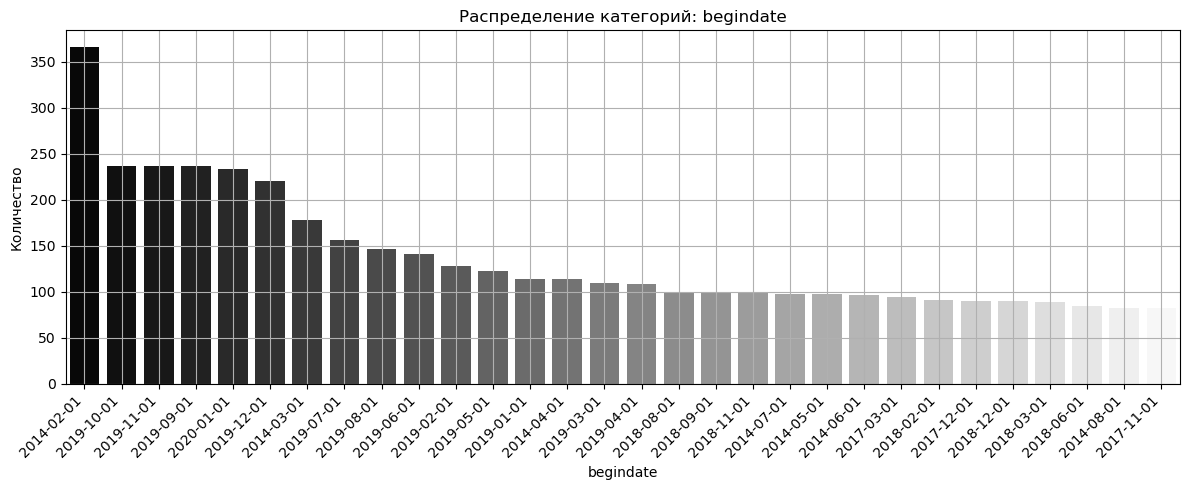

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


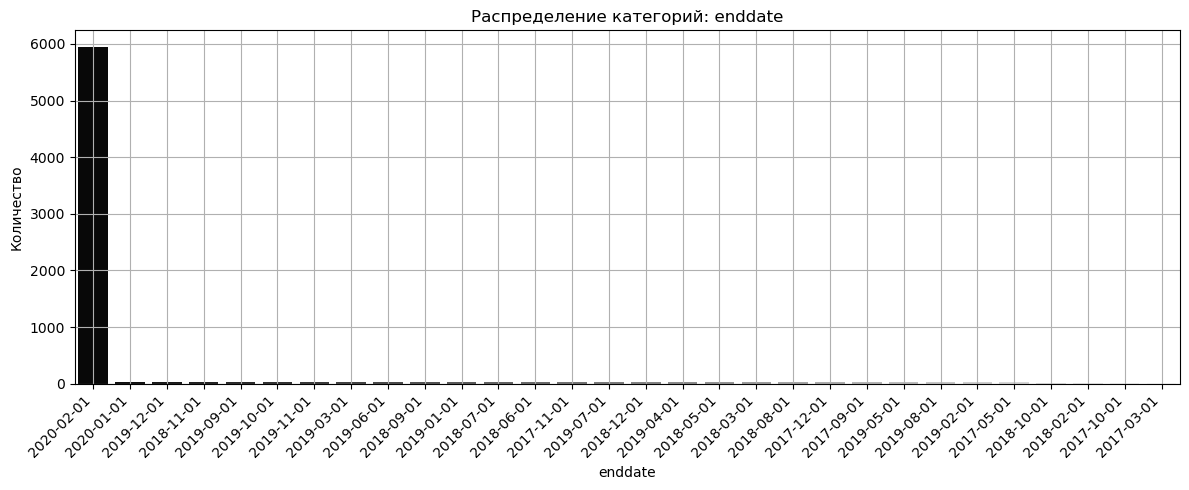

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


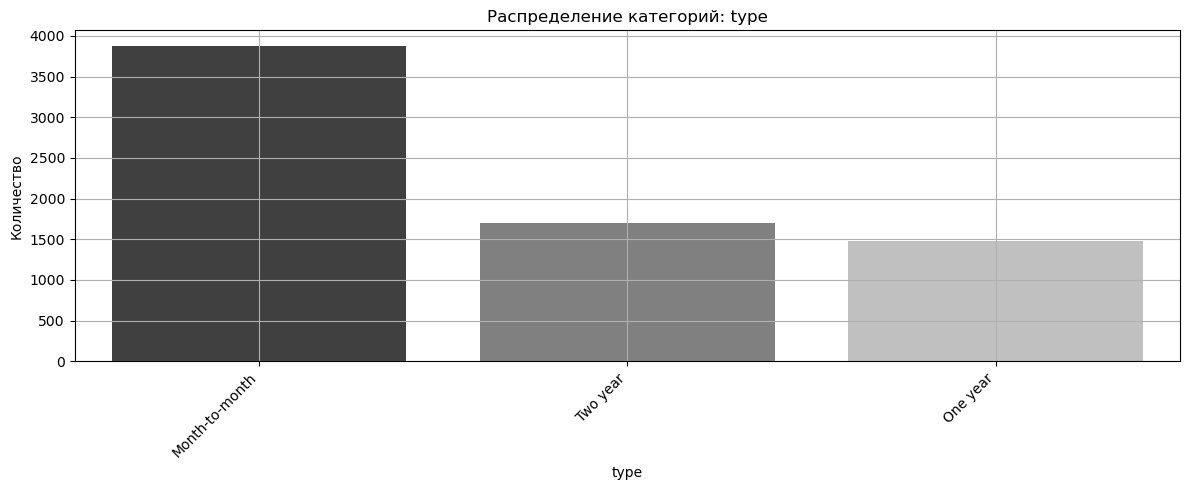

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


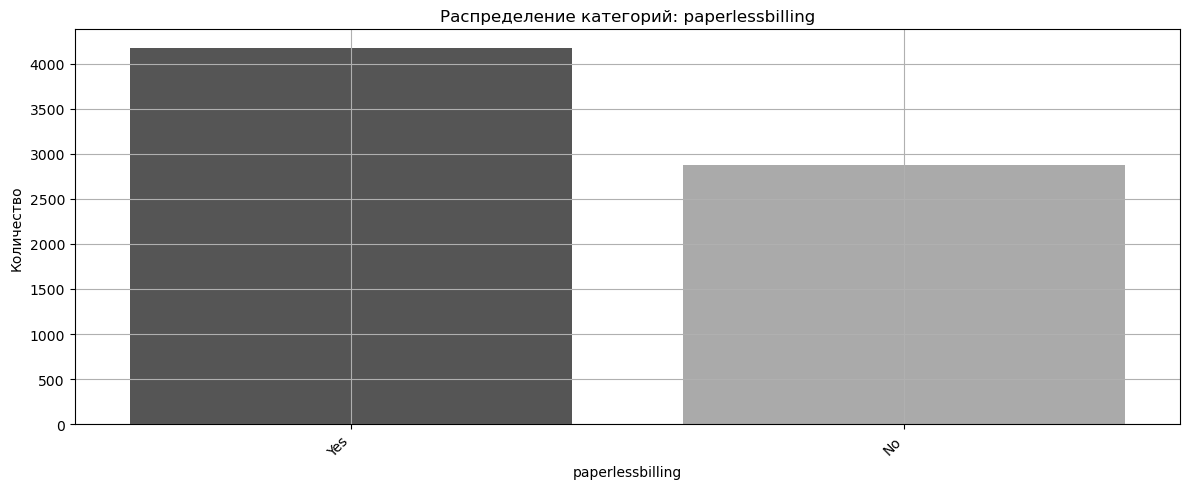

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


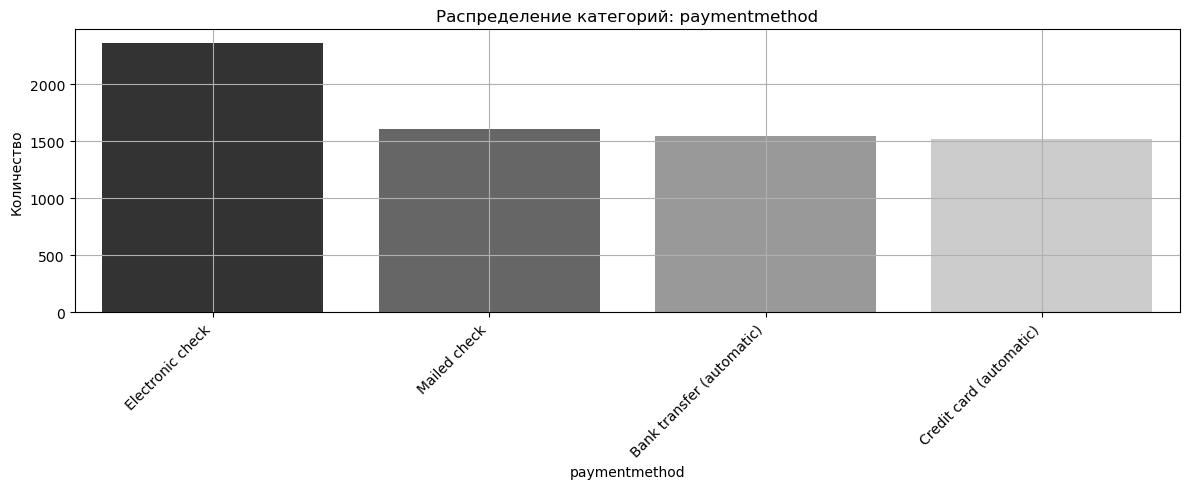

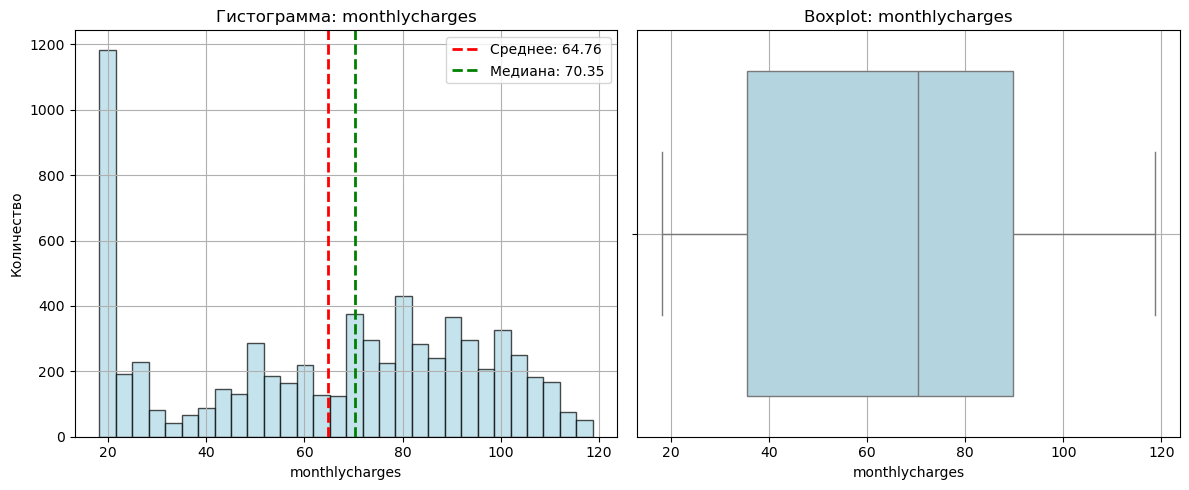

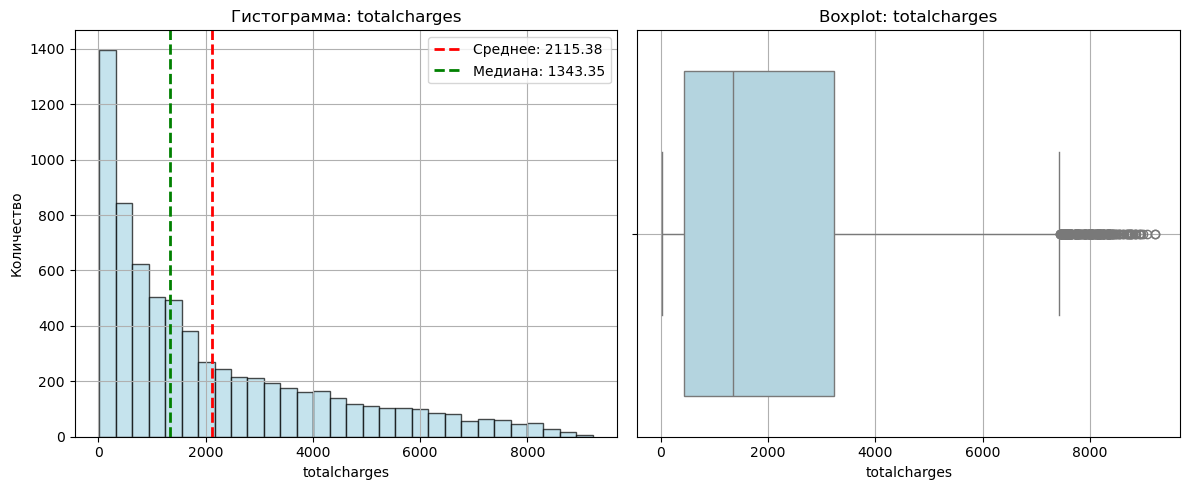

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


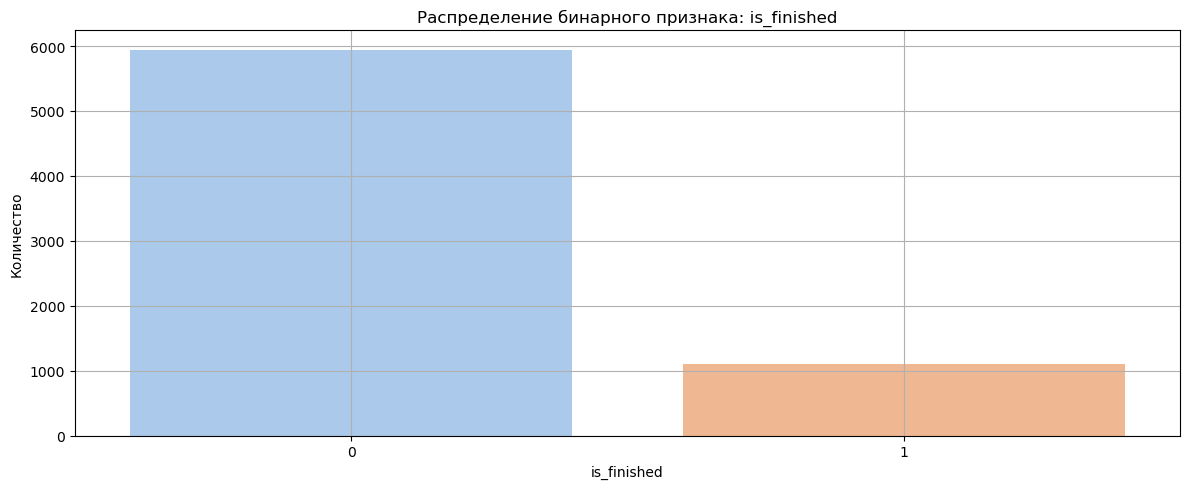

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


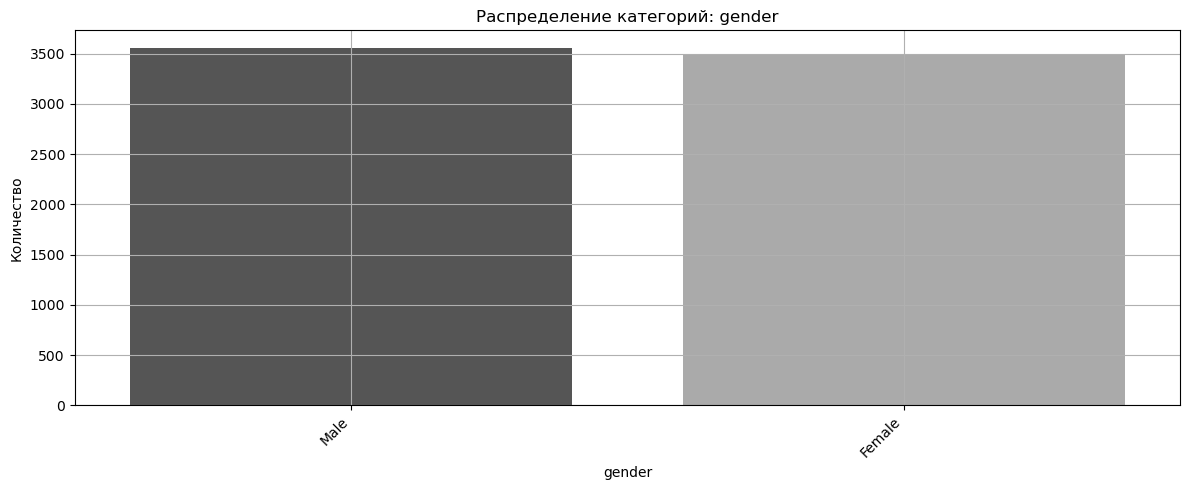

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


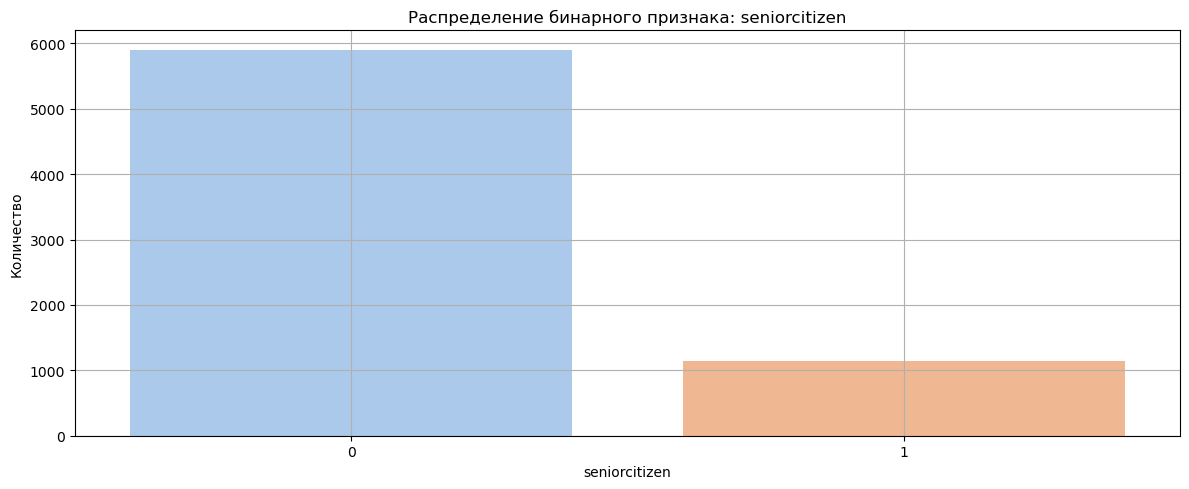

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


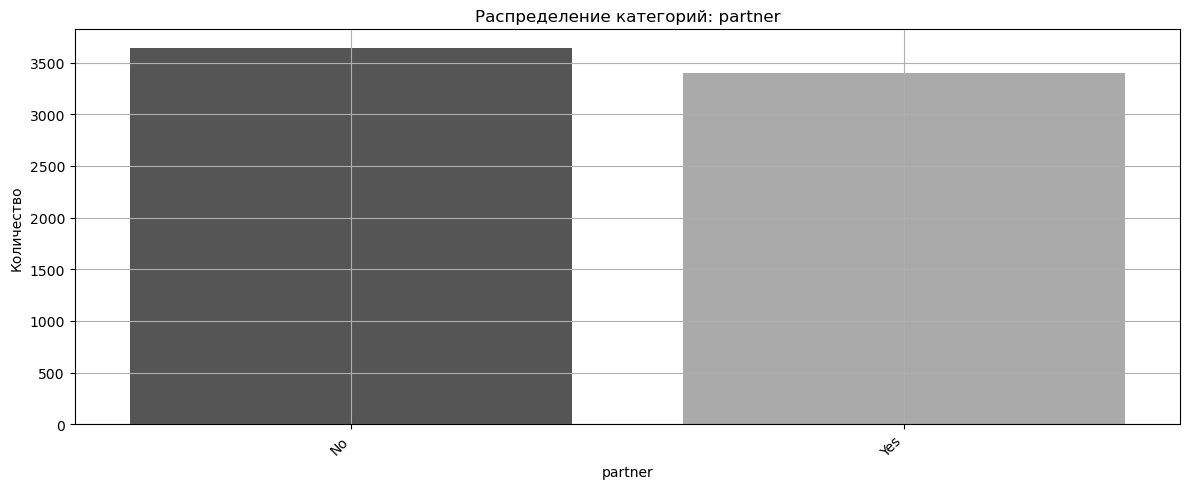

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


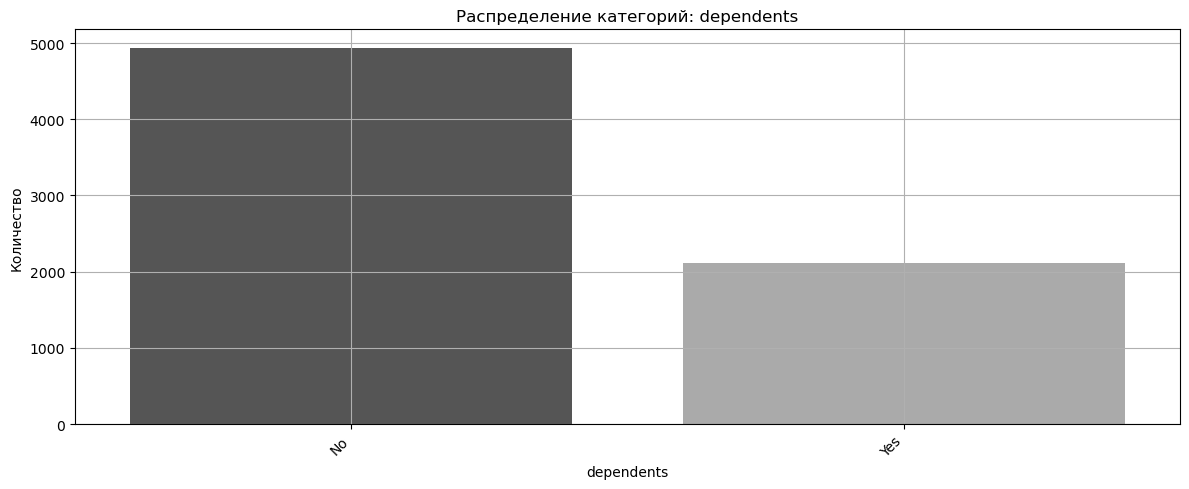

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


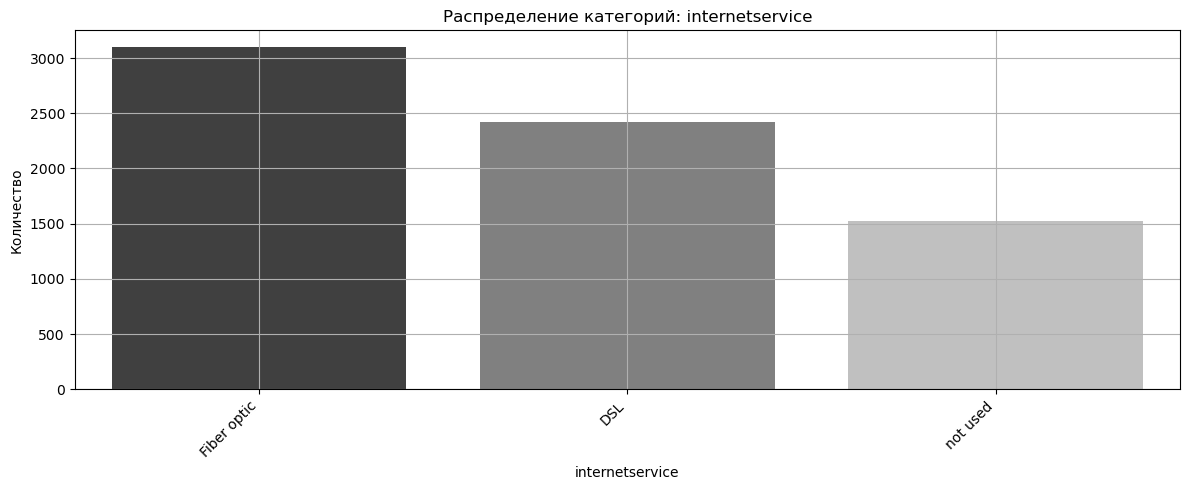

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


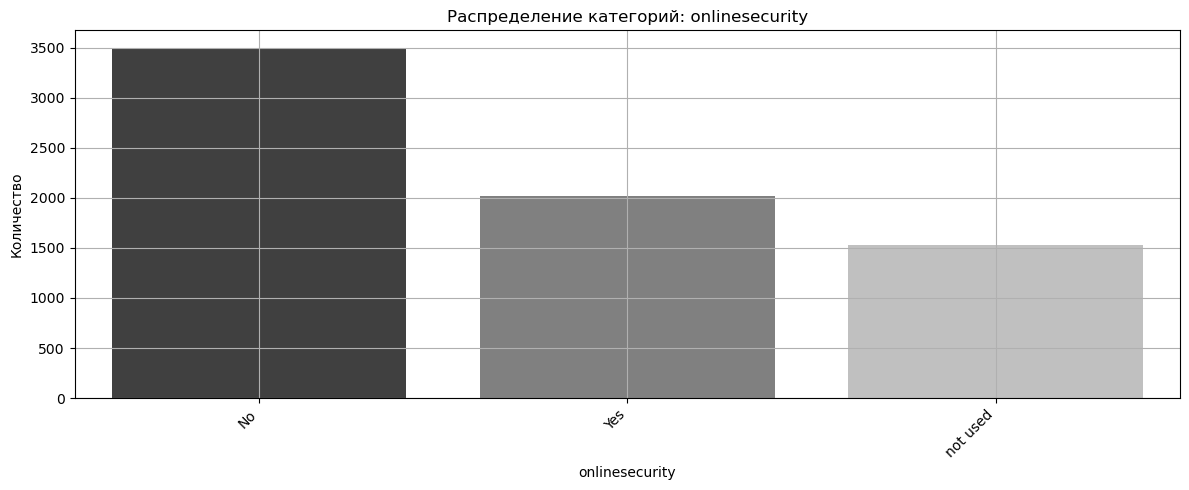

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


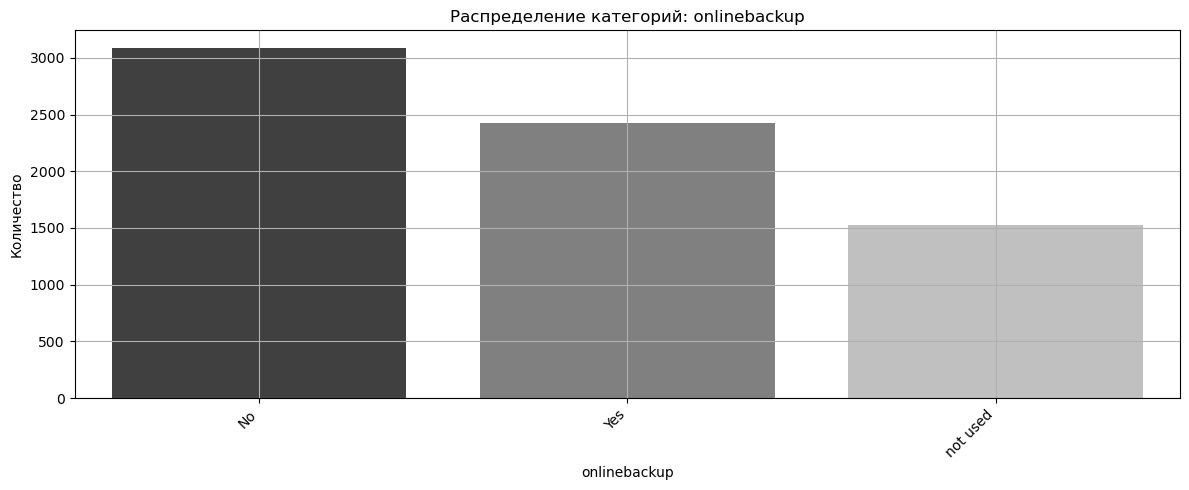

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


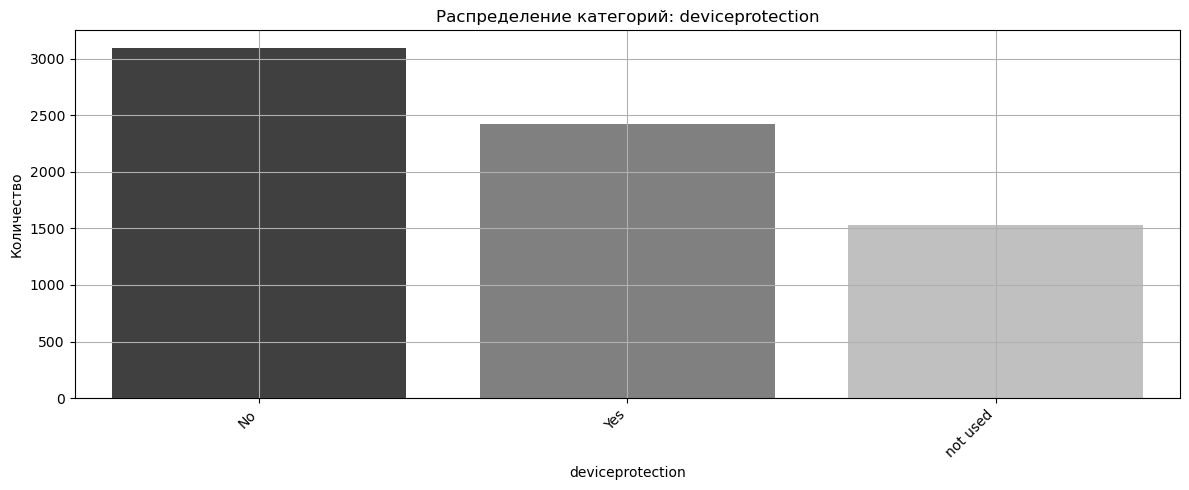

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


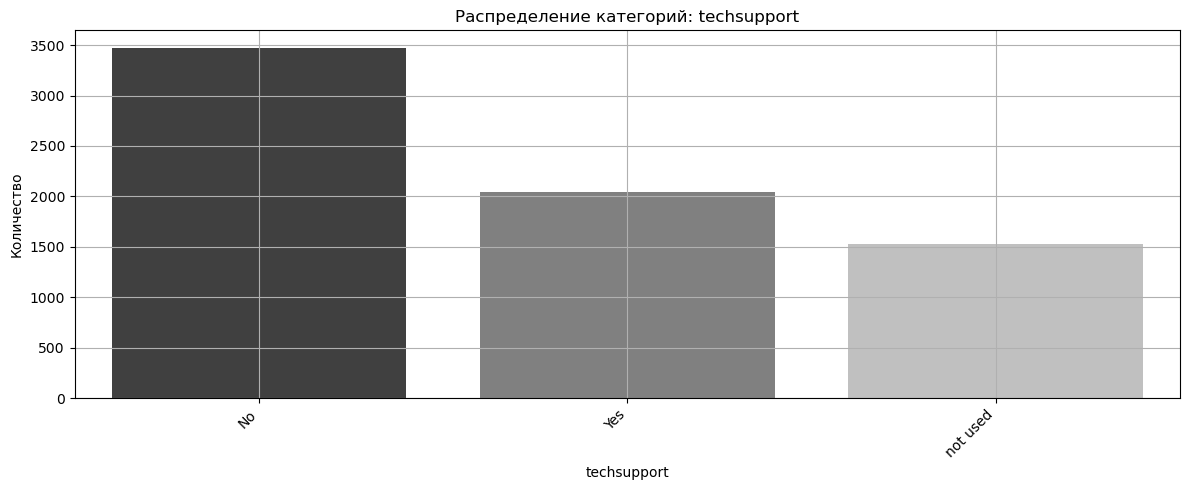

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


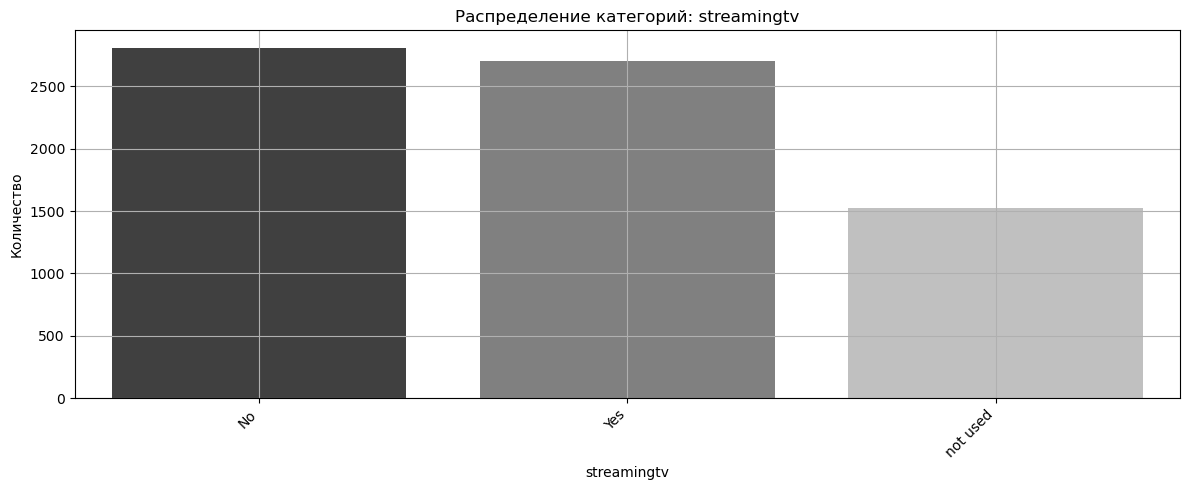

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


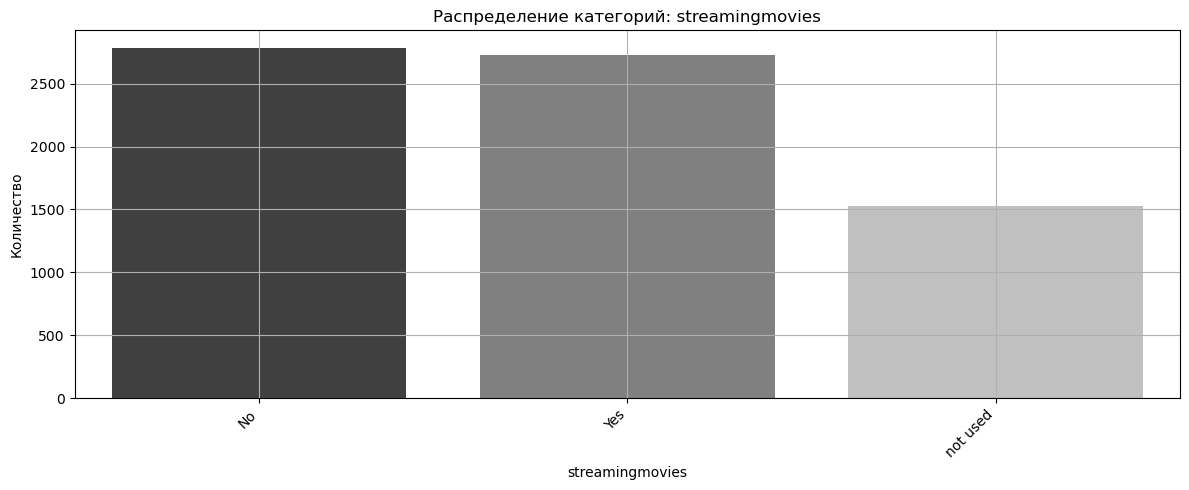

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().nlargest(30).index, palette='gray')


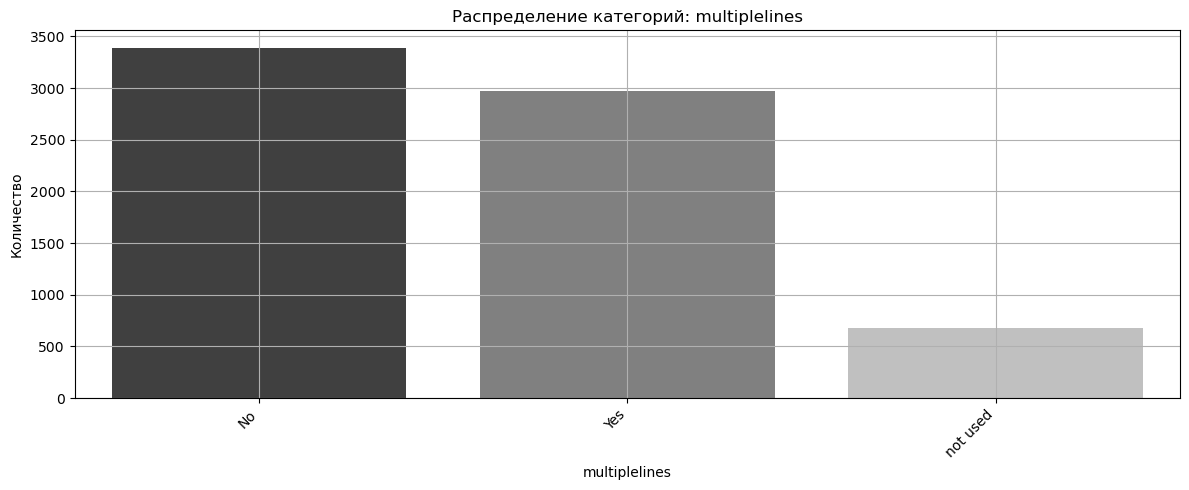

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


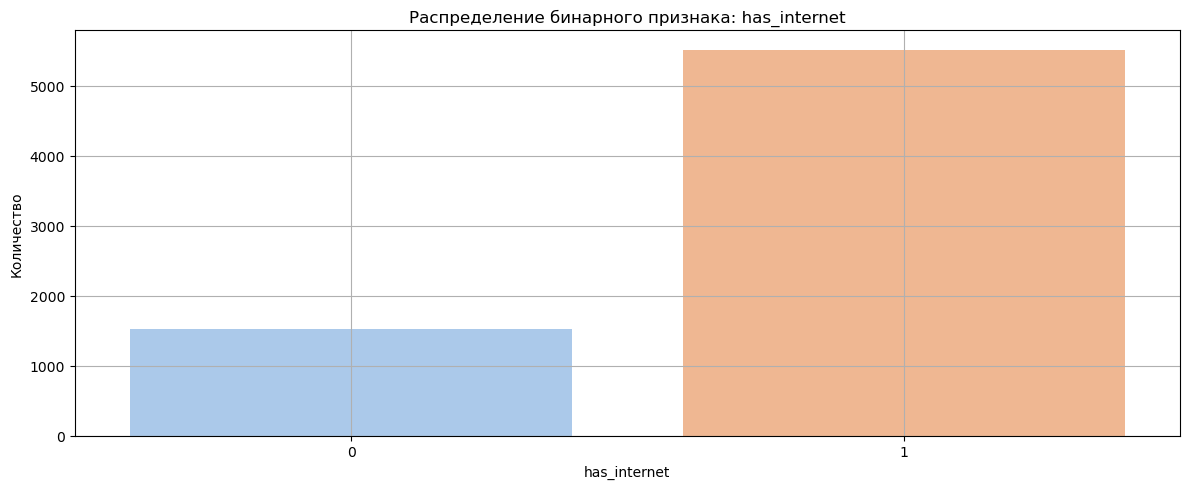

/var/folders/2z/tbfcmj7n78x0292gmq3_lsm00000gn/T/ipykernel_32046/3997275481.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


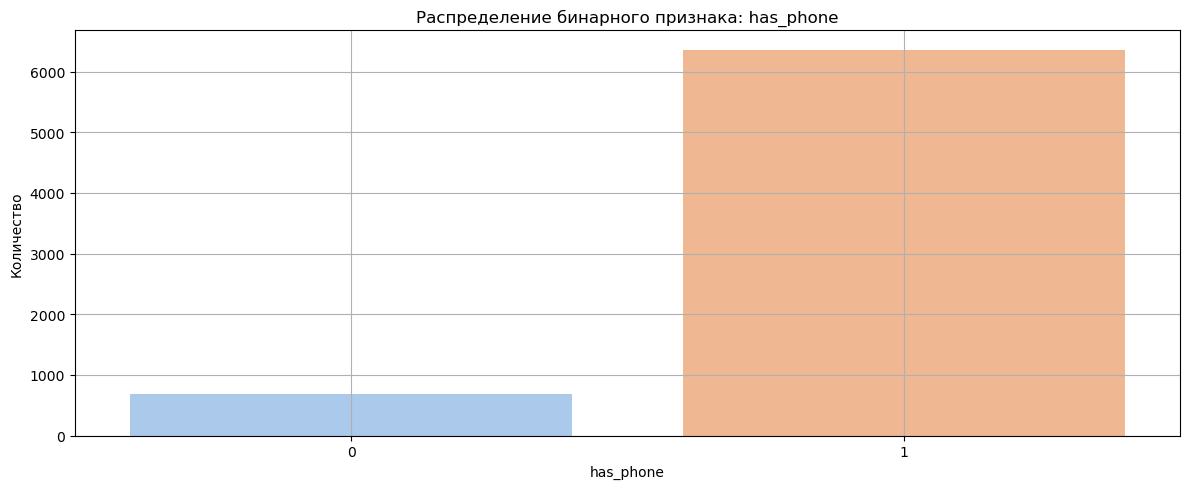

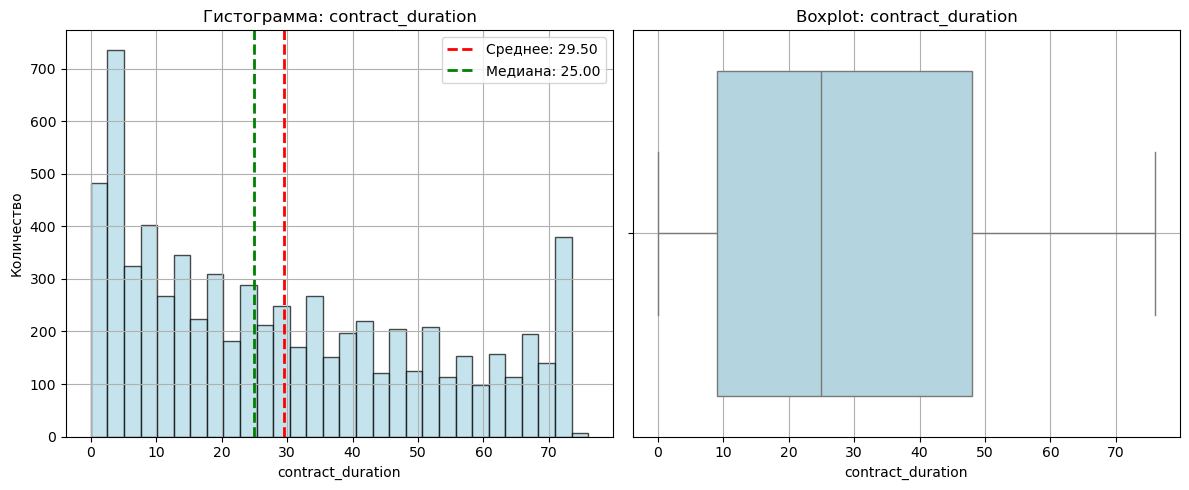

In [53]:
# построим графики для таблицы
col_plot(df, df.columns.drop('customerid'))        

- Больше всего договоров было заключено в феврале 2014 года. Возможно, это связано с проведением успешной рекламной кампании. 

- Среди всех дат окончания догорова наиболее часто встречается 1 февраля 2020 года. Это произошло потому что мы заменяли значение «No» в данном столбце, означающее, что договор еще активен, на дату, соответсвующую актуальности данных (1 февраля 2020 года)

- Большинство клиентов платят по тарифу ежемесячно 

- Более 4000 клиентов получают электронные чеки

- Наиболее распространена оплата по электронному чеку

- В среднем месячная плата составляет около 65 долларов. Однако медианное значение равно 70.35. У меньших значений около нуля присутствуют выбросы и среднее смещено влево, а значит есть клиенты, которые платят гораздо меньше остальных. 

- Общие расходы клиента: на боксплоте заметны выбросы в стороне больших значений. На гистограмме есть длинный хвост в правой стороне. Из-за этого среднее почти на 800 долларов выше, чем медиана.

- Пол клиента: мужчины и женщины пользуются услугами сервиса примерно в равной степени 

- Среди клиентов есть около 1000 пренсионеров

- Разница между женатыми и неженатыми клиентами невелика, однако есть небольшой перевес в сторону пользователей без супруга.

- Клиентов без детей больше в два раза, чем с детьми

- Большинство клиентов, пользующихся интернетом предпочитают тип подключения - оптоволоконный кабель.

- Блокировка опасных сайтов подключена более чем у 2000 пользователей, однако у большинства клиентов этой услугой не пользуются

- облачным хранилищем файлов для резервного копирования данных пользуются около 2500 клиентов

- У большинства пользователей нет антивируса, а также выделенной линии тех. поддержки. 

- Стриминговое телевидении и каталог фильмов использует примерно половина от общего числа пользователей. 

- подключение телефона к нескольким линиям одновременно используют около 3000 клиентов, однако примерно такое же количество клиентов все-таки отказались от данной услуги.

- Более 5000 пользователей подключили интернет-услуги

- Более 6000 клиентов пользуются услугами телефонии

- По гистограмме и боксплоту видно что длительность договора имеет большой разброс. Хвост длиннее в стороне больших значений, а значит у компании есть клиенты, которые долгое время остаются лояльными (около 6 лет). Благодаря ним среднее смещено вправо. Медиана равняется 25, а значит большая часть клиентов пользуется услугами около двух лет. Однако около нуля заметен наиболее яркий пик, это могут быть клиенты, которые, например, пользовались лишь льготным периодом, либо сделали выбор в пользу другой фирмы. Следовательно, у клиентов первое время после подключения повышен риск оттока и им следует предлагать специальные возможности. 

- Только около 1000 договоров больше неактивны, остальные являются актуальными

## Анализ рассеивания и корреляционный анализ

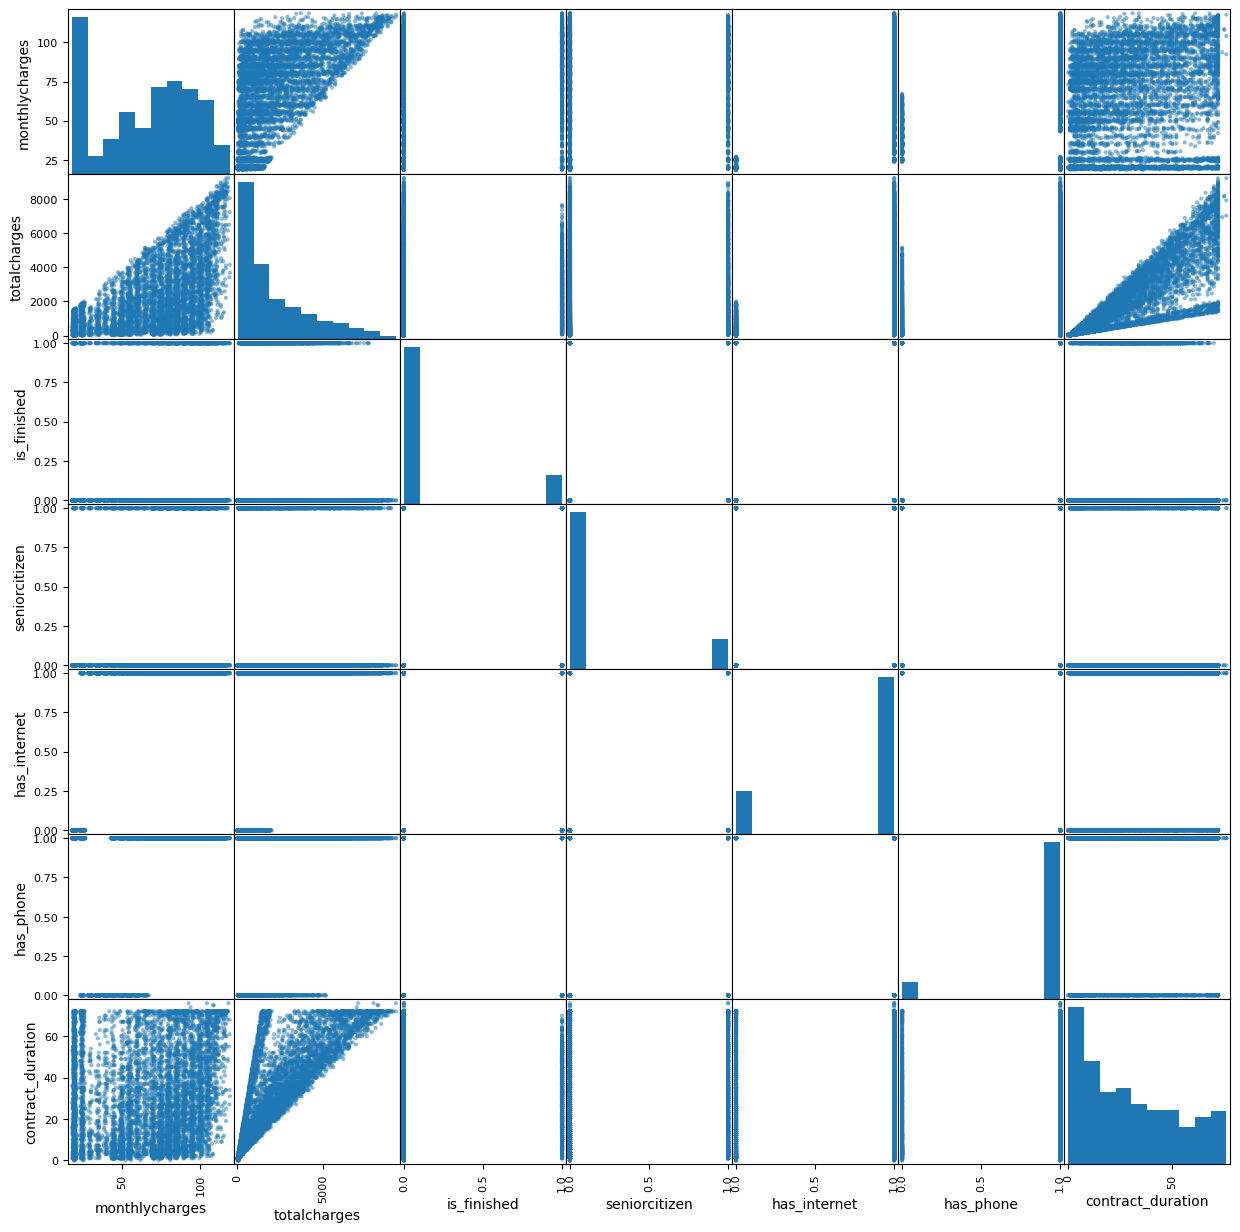

In [59]:
# построим матрицу рассеивания
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()


Выводы:
1. Monthly Charges и Total Charges
- Видна сильная линейная зависимость — чем выше ежемесячная плата, тем выше общие расходы клиента.
- При небольшом сроке контракта разброс выше — вероятно, клиенты недавно начали пользоваться услугами.
2. Senior Citizen
- Нет явной зависимости с платежами, но можно заметить, что пожилые пользователи чаще выбирают контракты с меньшим сроком.
- стоит изучить, влияет ли возраст на выбор услуг.
3. Internet и Phone Services
- Клиенты с интернет-услугами платят больше, что логично.
- Отсутствие телефона не влияет так сильно, как отсутствие интернета.
4. Contract Duration
- Чем выше длительность контракта, тем выше общие траты, но ежемесячная плата бывает ниже — возможны скидки при длительном договоре.
- Клиенты с долгосрочными контрактами более устойчивы.

построим тепловую карту, отражающую коэффициент корреляции Фи, который находит взаимосвязь между категориальными, порядковыми и интервальными признаками. Чем ближе его значение по модулю к 1, тем сильнее связь.

In [62]:
# создадим новые признаки 

# количество дней с момента заключения договора
df['contract_age_days'] = (pd.to_datetime('2020-02-01') - df['begindate']).dt.days

# индикатор нового клиента
df['is_new_client'] = (df['contract_duration'] < 3).astype(int)

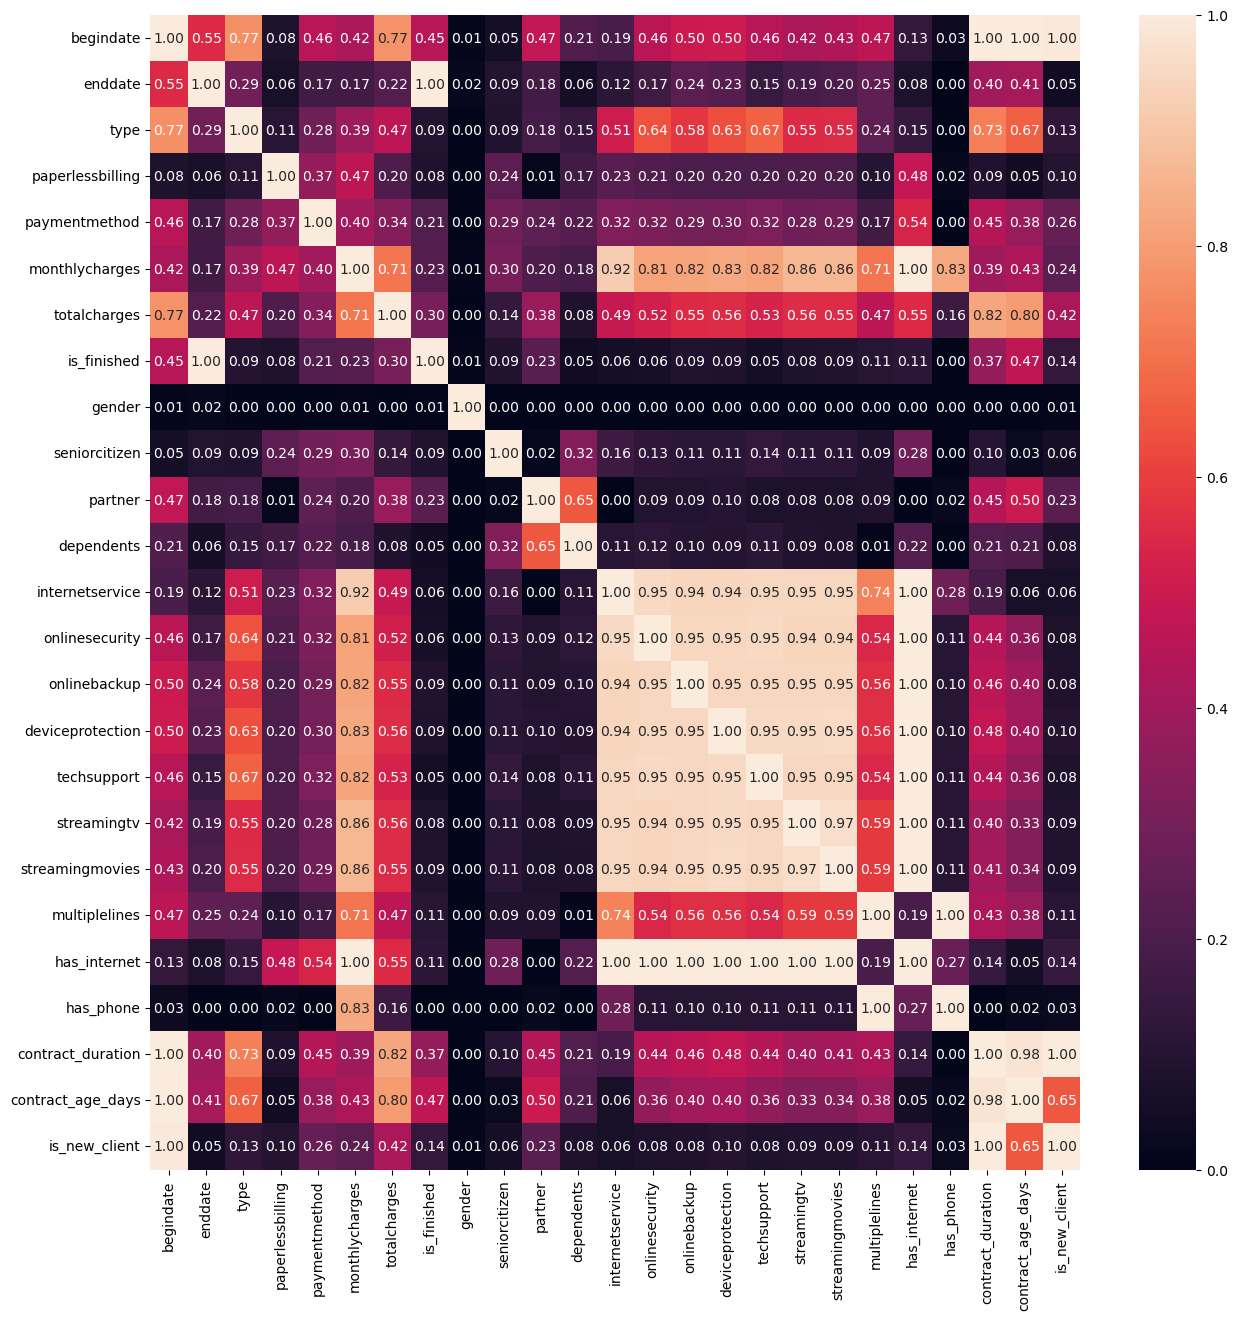

In [63]:
# построим матрицу корреляции

interval_cols = [
    'monthlycharges',
    'totalcharges',
    'contract_age_days'
    
]

df_cleaned = df.drop(columns=['customerid'])

plt.figure(figsize=(15, 15))
sns.heatmap(df_cleaned.phik_matrix(
    interval_cols=interval_cols), annot=True, fmt='.2f')
plt.show()

Основные наблюдения:
1. Сильные связи между услугами: internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies (0.92–0.97).
   
- Это говорит о том, что если клиент использует одну из интернет-услуг, с большой вероятностью он использует и другие.
- Возможно, эти услуги продаются в пакете или влияют друг на друга в процессе выбора.

2. totalcharges напрямую зависит от monthlycharges и contract_duration.

3. пол почти не коррелирует ни с чем.
- Значит, пол клиента не влияет на поведение или выбор услуг.


4. seniorcitizen — очень слабые связи (< 0.30) с большинством переменных.


5. от типа подключения и наличия дополнительных интернет-услуг зависит месячная плата

6. Наличие цифровых услуг приведем к бинарному формату (0,1). Это создаст единый признак, отражающий факт использования хотя бы одного цифрового сервиса, что устраняет избыточность.

7. Далее удалим признаки, которые:
-  уже учтены в has_digital_services;
- имеют высокую корреляцию с другими (begindate, enddate);
-  не несут полезной информации (gender — слабая корреляция).

8. customerid — уникальный идентификатор, он не несёт предсказательной ценности и удаляется перед обучением модели.

In [67]:
# создаем новый признак, который отражает наличие цифровых услуг
cols = ['onlinebackup', 'techsupport', 'deviceprotection',
        'streamingtv', 'streamingmovies', 'onlinesecurity']

df['has_digital_services'] = df[cols].apply(
    lambda row: 'Да' if 'Yes' in row.values else 'Нет',
    axis=1
)

df = df.drop(columns=['onlinebackup', 'techsupport', 'deviceprotection', 'streamingtv', 
                      'streamingmovies', 'begindate', 'has_internet', 'onlinesecurity', 
                      'has_phone', 'gender', 'enddate', 'monthlycharges', 'contract_duration' ])

df['has_digital_services'].value_counts()

has_digital_services
Да     4824
Нет    2219
Name: count, dtype: int64

In [70]:
df_cleaned = df.drop(columns=['customerid'])

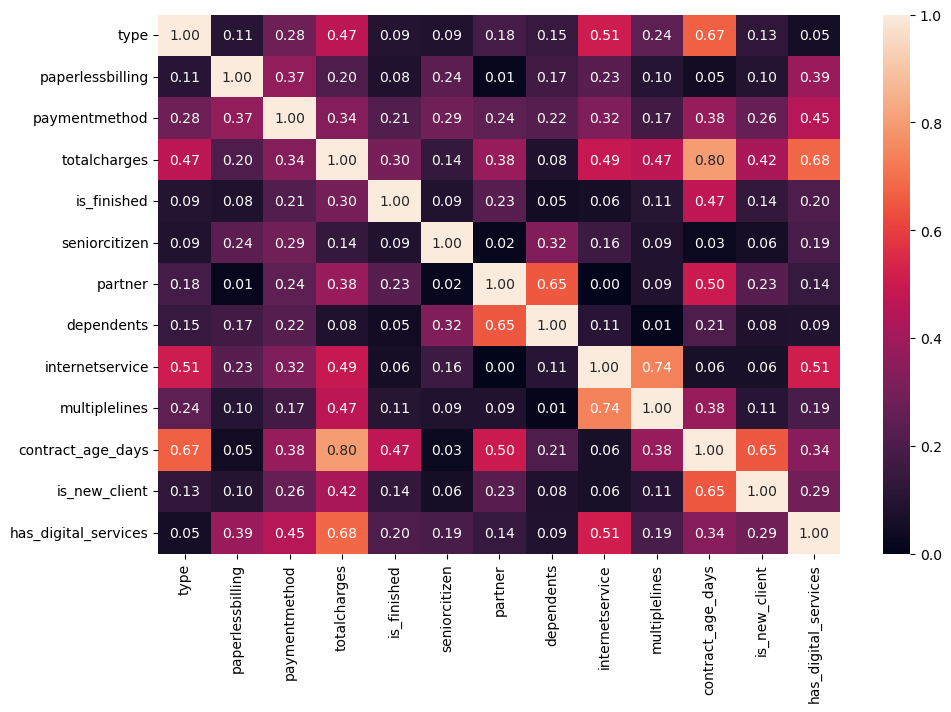

In [71]:
plt.figure(figsize=(11, 7))
sns.heatmap(df_cleaned.phik_matrix(
    interval_cols=interval_cols), annot=True, fmt='.2f')
plt.show()

- На этапе анализа рассеивания и корреляционного анализа выявлены ключевые зависимости между признаками, влияющими на поведение клиентов. В частности, наблюдается сильная линейная связь между ежемесячными и общими расходами.
- Также видно, что клиенты с короткими контрактами демонстрируют больший разброс в тратах, что может свидетельствовать о недавнем подключении.
-  Признак "Senior Citizen" не показывает прямой связи с платежами, но указывает на склонность пожилых клиентов к краткосрочным контрактам — это может быть важным фактором при персонализации предложений.
-  Интернет-услуги оказывают заметное влияние на уровень расходов, в то время как наличие телефонной связи не столь существенно. -
-  Длительность контракта также играет роль: долгосрочные клиенты платят меньше ежемесячно, но больше в сумме, что может быть связано с предоставлением скидок.
-  Эти наблюдения позволили оптимизировать признаки: цифровые сервисы агрегированы в бинарный индикатор, а избыточные и слабо коррелирующие переменные удалены. Это упрощает модель, снижает шум и повышает её интерпретируемость, сохраняя при этом ключевые признаки.

## Шаг 5: Подготовка данных

в таблице осталось 13 стобцов и 7032 записи. разделим их на обучающую и тестовую выборку 

In [78]:
# Разделение данных на обучающую и тестовую выборки
X = df_cleaned.drop('is_finished', axis=1)
y = df_cleaned['is_finished']

X_train, X_test, y_train, y_test = train_test_split(X, 
    y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y
)
print(X_train.shape, X_test.shape)

(5282, 12) (1761, 12)


In [80]:
# кодируем категориальные признаки
cat_columns = ['type', 'paperlessbilling', 'paymentmethod', 'partner', 'dependents', 'internetservice', 'multiplelines', 'seniorcitizen', 'is_new_client', 'has_digital_services']

# масштабируем числовые признаки
num_columns = ['totalcharges', 'contract_age_days']
scaler = StandardScaler()

## Шаг 6: Обучение моделей

In [82]:
# Преобразования
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_columns),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]), cat_columns)
])

In [83]:
# Пайплайн с логистической регрессией
logreg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear', random_state=RANDOM_STATE))  
])

In [86]:
# RandomizedSearchCV с метрикой ROC AUC
param_grid_logreg = {
    'model__C': [0.01, 0.1, 1, 10]
}

grid_logreg = RandomizedSearchCV(
    estimator=logreg_pipe,
    param_distributions=param_grid_logreg,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [89]:
# Обучение модели
print("Обучение Logistic Regression:")
grid_logreg.fit(X_train, y_train)

train_time_logreg = grid_logreg.refit_time_
print(f"Logistic Regression обучение завершено за {train_time_logreg} сек")

print(" Лучшая модель:")
print(grid_logreg.best_estimator_)

# Метрики
cv_roc_auc = grid_logreg.best_score_

# Вывод результатов
print(f"\nROC AUC на кросс-валидации: {cv_roc_auc:.4f}")

Обучение Logistic Regression:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression обучение завершено за 0.02030801773071289 сек
 Лучшая модель:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['totalcharges',
                                                   'contract_age_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                     

Логистическая регрессия показала ROC AUC 0.92 на кросс-валидации, что говорит о неплохом качестве разделения классов

In [91]:
# Decision Tree

# Преобразования
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), num_columns),  # Числовые признаки
    ('cat', TargetEncoder(smoothing=0.5), cat_columns)      # Категориальные признаки
])

# Пайплайн с деревом решений
tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(
        random_state=RANDOM_STATE
    ))
])

In [94]:
# Гиперпараметры для RandomizedSearchCV
param_grid_tree = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

print("\n Поиск гиперпараметров для Decision Tree:")

# RandomizedSearchCV
tree_rs = RandomizedSearchCV(
    estimator=tree_pipe,
    param_distributions=param_grid_tree,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_iter=10,
    n_jobs=-1,
    verbose=2
)

# Обучение модели
tree_rs.fit(X_train, y_train)
tree_train_time = tree_rs.refit_time_
cv_roc_auc = tree_rs.best_score_

print(f"\n Decision Tree обучение завершено за {tree_train_time:.2f} сек")
print(" Лучшая модель (Decision Tree):")
print(tree_rs.best_estimator_)
print(f" ROC AUC на кросс-валидации: {cv_roc_auc:.4f}")


 Поиск гиперпараметров для Decision Tree:
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Decision Tree обучение завершено за 0.04 сек
 Лучшая модель (Decision Tree):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['totalcharges',
                                                   'contract_age_days']),
                                                 ('cat',
                                                  TargetEncoder(smoothing=0.5),
                                                  ['type', 'paperlessbilling',
                                                   'paymentmethod', 'partner',
                                                   'dependents',
                                                   'internetservice',
                                                   'multiplelines',
                                                   'seniorcitizen',
   

Модель дерева решений показала достойный результат с ROC AUC 0.9 на кросс-валидации, что говорит о её способности выявлять закономерности в данных. Обучение прошло всего за 0.03 секунды, однако справилась она хуже логистической регрессии

In [96]:
# Модель CatBoost
catboost_model = CatBoostClassifier(
    iterations=500,
    depth=8,
    verbose=0,
    cat_features=cat_columns,  # передаём список категориальных признаков
    random_state=RANDOM_STATE
)

# Оборачиваем модель в Pipeline
catboost_pipe = Pipeline([
    ('model', catboost_model)
])

# Гиперпараметры для RandomizedSearchCV
param_grid_cat = {
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__depth': [4, 6, 8],
    'model__iterations': [100, 300, 500],
    'model__l2_leaf_reg': [1, 3, 5, 7, 9]
}

# RandomizedSearchCV
grid_catboost = RandomizedSearchCV(
    estimator=catboost_pipe,
    param_distributions=param_grid_cat,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# Обучение модели
print("Обучение CatBoost:")
grid_catboost.fit(X_train, y_train)

train_time_catboost = grid_catboost.refit_time_
print(f"CatBoost обучение завершено за {train_time_catboost} сек")


print(" Лучшая модель:")
print(grid_catboost.best_estimator_)
# Метрики
cv_roc_auc = grid_catboost.best_score_

# Вывод результатов
print(f"\nROC AUC на кросс-валидации: {cv_roc_auc:.4f}")

Обучение CatBoost:
CatBoost обучение завершено за 0.8218319416046143 сек
 Лучшая модель:
Pipeline(steps=[('model',
                 <catboost.core.CatBoostClassifier object at 0x16ab179b0>)])

ROC AUC на кросс-валидации: 0.9490


Модель CatBoost показала уверенное качество классификации с ROC AUC около 0.95 на кросс-валидации, что свидетельствует о высокой способности различать классы. Быстрый подбор гиперпараметров через RandomizedSearchCV занял менее секунды, а итоговая модель эффективно справилась с категориальными признаками без дополнительного кодирования. Попробуем предсказать значения тестовой выборки данной моделью.

## Шаг 7: Оценка и выбор модели

In [100]:
# Предсказания
start_time = time.time()
y_pred_proba = grid_catboost.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_class = grid_catboost.best_estimator_.predict(X_test)
end_time = time.time()

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
test_accuracy = accuracy_score(y_test, y_pred_class)

print(f"ROC AUC на тесте: {test_roc_auc:.4f}")
print(f"Accuracy на тесте: {test_accuracy:.4f}")

prediction_time_catboost = end_time - start_time
print(f"Время предсказания: {prediction_time_catboost:.4f} сек")

ROC AUC на тесте: 0.9436
Accuracy на тесте: 0.9466
Время предсказания: 0.0059 сек


- Accuracy (точность) показывает, какая доля всех предсказаний модели оказалась верной.
- Значение около 0.95 означает, что модель правильно классифицирует клиентов в 95% случаев. То есть почти 95 из 100 клиентов получают корректный прогноз. Следовательно модель верно определяет поведение клиентов (уход/продление контракта). Высокая метрика аccuracy снижает риски неверных решений — например, ошибочной рассылки.
- Однако аccuracy может быть обманчивой, так как классы несбалансированы. В нашем случае около 85% клиентов не уходят, а значит модель может просто всегда предсказывать "не уходит" и получить 95% метрику — но при этом не выявлять тех, кто реально уходит.
- Поэтому мы также смотрим на ROC AUC = 0.95, который показывает, насколько хорошо модель разделяет классы. Это подтверждает, что модель не просто угадывает, а действительно различает клиентов с разным поведением.

In [105]:
# Создание и обучение константной модели
dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

# Предсказания
y_dummy_pred = dummy.predict(X_test)
y_dummy_proba = dummy.predict_proba(X_test)[:, 1]

# Метрики
dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
dummy_roc_auc = roc_auc_score(y_test, y_dummy_proba)

print(f"\nDummyClassifier Accuracy: {dummy_accuracy:.4f}")
print(f"DummyClassifier ROC AUC: {dummy_roc_auc:.4f}")


DummyClassifier Accuracy: 0.8438
DummyClassifier ROC AUC: 0.5000


- DummyClassifier просто предсказывает самый частый класс, поэтому Accuracy может быть высокой, но ROC AUC = 0.5 — это означает, что модель не различает классы.
- модель показывает высокую и Accuracy и ROC AUC, а значит она действительно учится на признаках, а не просто повторяет угадывает


In [107]:
# Оценка важности признаков 
grid_catboost.best_estimator_.named_steps['model'].get_feature_importance(prettified=True)

,Feature Id,Importances
0,contract_age_days,34.682338
1,totalcharges,31.240726
2,internetservice,12.590322
3,multiplelines,6.407365
4,has_digital_services,5.474331
5,paymentmethod,3.538363
6,type,1.893116
7,partner,1.260373
8,paperlessbilling,1.113702
9,dependents,1.046618


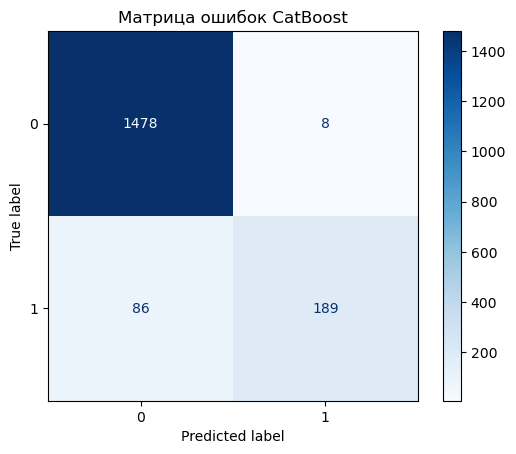

In [109]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Визуализация
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title("Матрица ошибок CatBoost")
plt.show()

- Модель CatBoost продемонстрировала отличные результаты: высокая точность (Accuracy 0.95%) и уверенное качество классификации (ROC AUC 0.94 на тесте), при этом обучение заняло менее секунды, а предсказание — всего 0.0062 сек, что делает её не только точной, но и быстрой.
- 94.66% Accuracy — модель почти всегда угадывает, кто уйдёт и кто останется.
- Анализ важности признаков показывает, что ключевым фактором является длительность контракта, которая вносит 33% в предсказания модели — это логично, ведь долгосрочные клиенты, как правило, более лояльны.
- За ним следуют тип подключения и общая сумма платежей, что подчёркивает финансовую составляющую как важный индикатор поведения клиента.
-  Менее значимыми оказались признаки вроде наличия цифровых услуг, возраста и наличия иждивенцев, что может говорить о слабой связи этих факторов с целевой переменной.
-  В целом, модель не только эффективна, но и интерпретируема, что делает её отличным выбором для бизнес-аналитики и принятия решений.
-  Модель отлично справляется с предсказанием "остававшихся" клиентов (True Negative), но хуже — с "ушедшими" (True Positive).

## Шаг 8: Вывод и бизнес-рекомендации

- В ходе работы был проведён полный цикл анализа и моделирования оттока клиентов компании «ТелеДом»: от объединения разнородных данных о договорах, клиентах и услугах до построения и сравнения моделей прогнозирования.
- Анализ показал, что ключевыми факторами, влияющими на лояльность клиента, являются длительность контракта, тип подключения, ежемесячные и общие платежи, а также использование интернет-услуг. Пол, возраст и наличие иждивенцев оказались менее значимыми признаками.
- Наилучшие результаты показала модель CatBoost: ROC AUC = 0.95, Accuracy = 0.94 на тесте. Модель обучается быстро, хорошо работает с категориальными признаками и позволяет интерпретировать важность факторов.
-  При этом основной проблемой остаётся относительно высокое число False Negatives (модель не всегда вовремя "замечает" клиентов, склонных к оттоку), что особенно критично в задаче удержания.


**Бизнес-рекомендации**
1. Удержание на ранних этапах
- Наибольший риск оттока у клиентов с короткими контрактами (Month-to-month).
- Следует предлагать им специальные условия лояльности уже в первые месяцы (скидки, расширенные пакеты услуг, бонусы за продление).
2. Продвижение долгосрочных контрактов
- Длительность договора — главный фактор лояльности.
- Запуск акций, стимулирующих переход на годовые и двухгодичные тарифы (например, скидка при оплате за 12 месяцев вперёд), может существенно сократить отток.
3. Фокус на интернет-услугах
- Наличие интернет-сервисов сильно коррелирует с платежами и оттоком.
- Стоит предлагать пакетные тарифы (интернет + цифровые сервисы) и подчёркивать ценность дополнительных опций.
4. Финансовая сегментация клиентов
- Клиенты с высокими ежемесячными платежами чаще уходят.
- Для них полезно вводить персональные скидки, гибкие тарифы или возможность временного снижения нагрузки (например, "заморозка" тарифа).
5. Работа с пожилыми клиентами
- Senior citizens чаще выбирают краткосрочные контракты.
- Рекомендуется внедрить отдельные предложения для пенсионеров (соцтарифы, персонализированные пакеты).
6. Мониторинг и триггерные акции
- Использовать модель CatBoost как систему раннего предупреждения: при снижении вероятности лояльности ниже определённого порога автоматически совершать удерживающие действия (звонок менеджера, предложение скидки, промокод).